# Kerangka Masalah

## Latar Belakang

Industri Software as a Service (SaaS) merupakan salah satu sektor dengan pertumbuhan ekonomi dalam product digitalisasi yang sangat pesat. Software as a service merupakan bisnis dalam penjualan product digital yang membantu user atau pengguna dalam bisnis mereka berbasis berlangganan dengan biaya dengan berbagai variasi dan kebutuhan. 


## Business Objectives
1. Mengukur **performansi bisnis SaaS**: revenue, pelanggan aktif, dan churn.

2. Memahami **profil pelanggan** (demografi, plan, segmentasi).

3. Mengidentifikasi **faktor yang memengaruhi churn & growth**.

4. Memberikan **strategi rekomendasi** untuk meningkatkan retensi dan revenue.

## Key Business Questions
Dari perusahaan Penjualan produk Saas (Software as a Service), beberapa data dapat kita analisa seperti tren penjualan hingga memberi strategi diskon untuk penjualan.

Sebagai data analyst kita ingin melihat faktor apa saja yang mempengaruhi kinerja penjualan dan profit. terdapat berbagai aspek yang perlu dianalisis untuk mendukung pengambilan keputusan bisnis.

1. Bagaimana tren **jumlah pelanggan aktif dan revenue** dari waktu ke waktu?

2. Segmen pelanggan mana yang memberikan kontribusi revenue tertinggi?  

3. Berapa tingkat non profitnya dan faktor apa yang paling berhubungan dengan penjualan non-profit?  

4. Bagaimana performa pelanggan baru dibanding pelanggan lama (retensi/upgrade)?  

## What's Need To Do (Apa yang harus dilakukan)

- Pertama, Analis perlu mengetahui bagaimana tren sales dan profit berkembang dari waktu ke waktu serta apakah terdapat pola musiman yang signifikan. 

- Kedua, Peran penting analis untuk mengidentifikasi segmen, produk, dan industri yang berkontribusi paling besar terhadap revenue, sekaligus melihat potensi produk yang menekan profit akibat pemberian diskon. 

- Selain itu, distribusi penjualan berdasarkan wilayah (region dan subregion) juga perlu dievaluasi guna menentukan pasar utama dan potensi ekspansi.

- Dan juga strategi pemberian diskon perlu dikaji apakah benar mampu meningkatkan penjualan atau justru mengurangi margin keuntungan.



In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats

Menempatkan dataset_path untuk mengambil data dari lokal

In [85]:
dataset_path = '/Users/sann/Downloads/dataset/'

Membaca dataset dari SaaS_Sales untuk di analisa

In [86]:
Saas_dataset = pd.read_csv(f"{dataset_path}/SaaS-Sales.csv")
Saas_dataset

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## Membuat salinan dataset 

In [87]:
Saas_dataset_clean = Saas_dataset.copy()
Saas_dataset_clean

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


# 2. Data Preparation (Data Understanding dan Data Cleaning)

Sebelum masuk ke tahapan analisa, kita perlu untuk memahami dataset Saas_Sales ini dan juga melakukan Data Cleansing untuk memastikan data memiliki konsistensi dan kualitas yang baik agar saat melakukan analisa dan mengambil keputusan berdampak tepat dan sesuai dengan bisnis.

## 2.1 Data Understanding

### 2.1.1 Data Shape dan Data Info

In [143]:
Dataset_shape = Saas_dataset_clean.shape

print(f'Jumlah baris dan kolom di dataset Saas_Sales adalah {Dataset_shape}')
print('-----------------------------------------')
Saas_dataset_clean.info()

Jumlah baris dan kolom di dataset Saas_Sales adalah (9645, 21)
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 9645 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9645 non-null   int64         
 1   Order ID       9645 non-null   object        
 2   Order Date     9645 non-null   datetime64[ns]
 3   Date Key       9645 non-null   int64         
 4   Contact Name   9645 non-null   object        
 5   Country        9645 non-null   object        
 6   City           9645 non-null   object        
 7   Region         9645 non-null   object        
 8   Subregion      9645 non-null   object        
 9   Customer       9645 non-null   object        
 10  Customer ID    9645 non-null   object        
 11  Industry       9645 non-null   object        
 12  Segment        9645 non-null   object        
 13  Product        9645 non

Menampilkan 5 dataset pertama dan 5 dataset terakhir

In [144]:
display(Saas_dataset_clean.head(),Saas_dataset_clean.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit_Flag,Profit_Status
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,Emea,Ukir,Chevron,...,Energy,Smb,Marketing Suite,16Grm07R1K,261.9600,2,0.00,41.9136,Positive,Profit
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,Emea,Ukir,Chevron,...,Energy,Smb,Financehub,Qliw57Kzuv,731.9400,3,0.00,219.5820,Positive,Profit
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,Amer,Namer,Phillips 66,...,Energy,Strategic,Financehub,Ji6Bvl70Hq,14.6200,2,0.00,6.8714,Positive,Profit
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,Emea,Eu-West,Royal Dutch Shell,...,Energy,Smb,Contactmatcher,De9Gjkgd44,957.5775,5,0.45,-383.0310,Valid,Non-Profit
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,Emea,Eu-West,Royal Dutch Shell,...,Energy,Smb,Marketing Suite - Gold,Oif7Ny23Wd,22.3680,2,0.20,2.5164,Positive,Profit


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit_Flag,Profit_Status
9989,9990,EMEA-2020-110422,2020-01-22,20200122,Dan Allan,Germany,Hamburg,Emea,Eu-West,Johnson & Johnson,...,Healthcare,Smb,Saas Connector Pack,Ethxmb5Tmd,25.248,3,0.2,4.1028,Positive,Profit
9990,9991,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,Amer,Namer,American Express,...,Finance,Smb,Saas Connector Pack,Lyhoktry7L,91.960,2,0.0,15.6332,Positive,Profit
9991,9992,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,Amer,Namer,American Express,...,Finance,Smb,Site Analytics,I5Svmi6M88,258.576,2,0.2,19.3932,Positive,Profit
9992,9993,AMER-2023-121258,2023-02-27,20230227,Anthony Sanderson,United States,Milwaukee,Amer,Namer,American Express,...,Finance,Smb,Support,Jhlw4P6Lq2,29.600,4,0.0,13.3200,Positive,Profit
9993,9994,AMER-2023-119914,2023-05-05,20230505,Jasmine Springer,United States,Dallas,Amer,Namer,Comcast,...,Communications,Smb,Oneview,3Ntbv9B3Ps,243.160,2,0.0,72.9480,Positive,Profit


Function **describe()** merupakan data deskriptif yang sangat berguna untuk mendapatkan pemahaman awal tentang kualitas dan karakteristik data sebelum melakukan analisis yang lebih mendalam. 

In [145]:
display(Saas_dataset_clean.describe(),Saas_dataset_clean.describe(include= object))

,Row ID,Order Date,Date Key,Sales,Quantity,Discount,Profit
count,9645.000000,9645,9.645000e+03,9645.000000,9645.000000,9645.000000,9645.000000
mean,4986.146604,2022-05-01 03:22:53.934681088,2.021802e+07,234.657649,3.782893,0.133664,35.331331
min,1.000000,2020-01-04 00:00:00,2.020010e+07,0.852000,1.000000,0.000000,-3839.990400
25%,2484.000000,2021-05-25 00:00:00,2.021052e+07,18.264000,2.000000,0.000000,2.370000
50%,4993.000000,2022-06-27 00:00:00,2.022063e+07,57.408000,3.000000,0.100000,9.302400
75%,7470.000000,2023-05-15 00:00:00,2.023052e+07,215.976000,5.000000,0.200000,31.018400
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,22638.480000,14.000000,0.700000,8399.976000
std,2883.593976,NaN,1.122994e+04,630.261769,2.224057,0.171776,212.690295


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Profit_Flag,Profit_Status
count,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645,9645
unique,4907,793,48,262,3,12,99,99,10,3,14,9645,2,2
top,EMEA-2023-100111,Leonard Kelly,United States,London,Emea,Namer,Allianz,1080,Finance,Smb,Contactmatcher,16Grm07R1K,Positive,Profit
freq,14,35,2001,922,4201,2507,190,190,2054,4996,1609,1,8123,8123


### 2.1.2 Check missing value

In [146]:
Saas_dataset_clean.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Date Key         0
Contact Name     0
Country          0
City             0
Region           0
Subregion        0
Customer         0
Customer ID      0
Industry         0
Segment          0
Product          0
License          0
Sales            0
Quantity         0
Discount         0
Profit           0
Profit_Flag      0
Profit_Status    0
dtype: int64

In [147]:
Saas_dataset_clean.isna().sum()/Saas_dataset_clean.shape[0]*100

Row ID           0.0
Order ID         0.0
Order Date       0.0
Date Key         0.0
Contact Name     0.0
Country          0.0
City             0.0
Region           0.0
Subregion        0.0
Customer         0.0
Customer ID      0.0
Industry         0.0
Segment          0.0
Product          0.0
License          0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
Profit_Flag      0.0
Profit_Status    0.0
dtype: float64

### 2.1.3 Pengecekan Data Duplikat

In [148]:
Saas_dataset_clean.duplicated().sum()

np.int64(0)

Setelah Dilakukan pengecekan missing value dan pengecekan data duplikat pada data Saas_sales tidak ditemukan adanya missing values dan juga tidak ditemukannya data yang duplikat

### 2.1.4 Checking Value on Column

In [149]:
column_unique_list = []

for column in Saas_dataset_clean.columns:
    column_unique_list.append(Saas_dataset_clean[column].unique())

In [150]:
pd.set_option('display.max_colwidth', None)

In [151]:
pd.DataFrame({
    'Column_name' : Saas_dataset_clean.columns,
    'Unique Value List' : column_unique_list
})

,Column_name,Unique Value List
0,Row ID,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, ...]"
1,Order ID,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, EMEA-2023-126382, AMER-2023-108329, AMER-2023-135860, ...]"
2,Order Date,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2021-11-21 00:00:00, 2021-12-15 00:00:00, 2020-11-19 00:00:00, 20

Gambaran secara umum dataset Saas_sales, bahwa data tersebut: 

* Dataset Saas_sales ini memiliki 18 kolom dan 9994 baris
* Kolom Row ID -> merupakan primary key/baris unik, bukan variabel analisis.
* Setelah di lakukan pengecekan missing value dan pengecekan data duplikat pada dataset ***tidak ditemukan adanya missing value dan juga data duplikat***
* Pola pada Order ID [`EMEA-2022-152156`] - merupakan pola [`Region`, `Tahun Transaksi` dan juga `Nomor Urut`], setiap tahun terdapat pencatatan unik sesuai wilayah dan tahun


### 2.1.5 Data Dictionary

SaaS_Sales Dataset

Tabel berikut menjelaskan **nama kolom, tipe data, dan deskripsi** dari setiap variabel yang ada di dataset *SaaS_Sales*.

| **Nama Kolom**   | **Tipe Data** | **Deskripsi**                                                                 | **Kegunaan Analisis**                                       |
|------------------|---------------|-------------------------------------------------------------------------------|-------------------------------------------------------------|
| `Row ID`         | int64         | Nomor urut baris data (primary key unik untuk setiap record transaksi).       | Identifikasi unik, biasanya tidak digunakan dalam analisis. |
| `Order ID`       | object        | Kode unik setiap pesanan/transaksi.                                           | Identifikasi transaksi, bisa dipakai untuk deteksi duplikat.|
| `Order Date`     | datetime      | Tanggal pesanan dibuat.                                                       | Analisis tren penjualan (time-series).                      |
| `Date Key`       | int64         | Representasi tanggal dalam bentuk angka (data warehouse).                     | Bisa diabaikan jika `Order Date` sudah tersedia.            |
| `Contact Name`   | object        | Nama kontak pelanggan.                                                        | Konteks pelanggan, jarang dipakai analisis kuantitatif.     |
| `Country`        | object        | Negara tempat transaksi dilakukan.                                            | Segmentasi geografis.                                       |
| `City`           | object        | Kota pelanggan berada.                                                        | Analisis granular per kota.                                 |
| `Region`         | object        | Wilayah besar (Asia, EMEA, America).                                          | Analisis regional.                                          |
| `Subregion`      | object        | Wilayah lebih detail dari `Region`.                                           | Analisis sub-wilayah.                                       |
| `Customer`       | object        | Nama perusahaan atau instansi pelanggan.                                      | Identifikasi pelanggan unik.                                |
| `Customer ID`    | int64         | ID unik untuk setiap pelanggan.                                               | Tracking pelanggan untuk churn/retensi.                     |
| `Industry`       | object        | Bidang industri pelanggan (Finance, Retail, Healthcare, dll).                 | Segmentasi industri.                                        |
| `Segment`        | object        | Segmentasi pelanggan (Small Business, Enterprise, Consumer).                  | Analisis segmen pelanggan.                                  |
| `Product`        | object        | Nama produk SaaS yang dibeli.                                                 | Analisis produk paling laku.                                |
| `License`        | object        | Jenis lisensi produk (Basic, Pro, Enterprise).                                | Analisis revenue per lisensi.                               |
| `Sales`          | float64       | Total nilai penjualan dari order tersebut.                                    | KPI utama → Revenue (MRR, Growth).                          |
| `Quantity`       | int64         | Jumlah unit produk yang dibeli.                                               | Analisis volume pembelian.                                  |
| `Discount`       | float64       | Persentase diskon yang diberikan (misalnya 0.2 = 20%).                        | Dampak diskon terhadap profit & penjualan.                  |
| `Profit`         | float64       | Keuntungan dari transaksi.                                                    | KPI utama → Profitability.                                  |

Dengan adanya **data dictionary** ini, analisis akan lebih terarah dan memudahkan pembaca memahami konteks tiap variabel.


### 2.1.6 Memahami data Sales, quantity , discountdengan interpretasi gambar chart grafik distribusi

`Numerical grafik dimana grafik ini berfokus pada persebaran nilai (seberapa besar atau seberapa sering data tersebut berperan dalam sebuah data)`

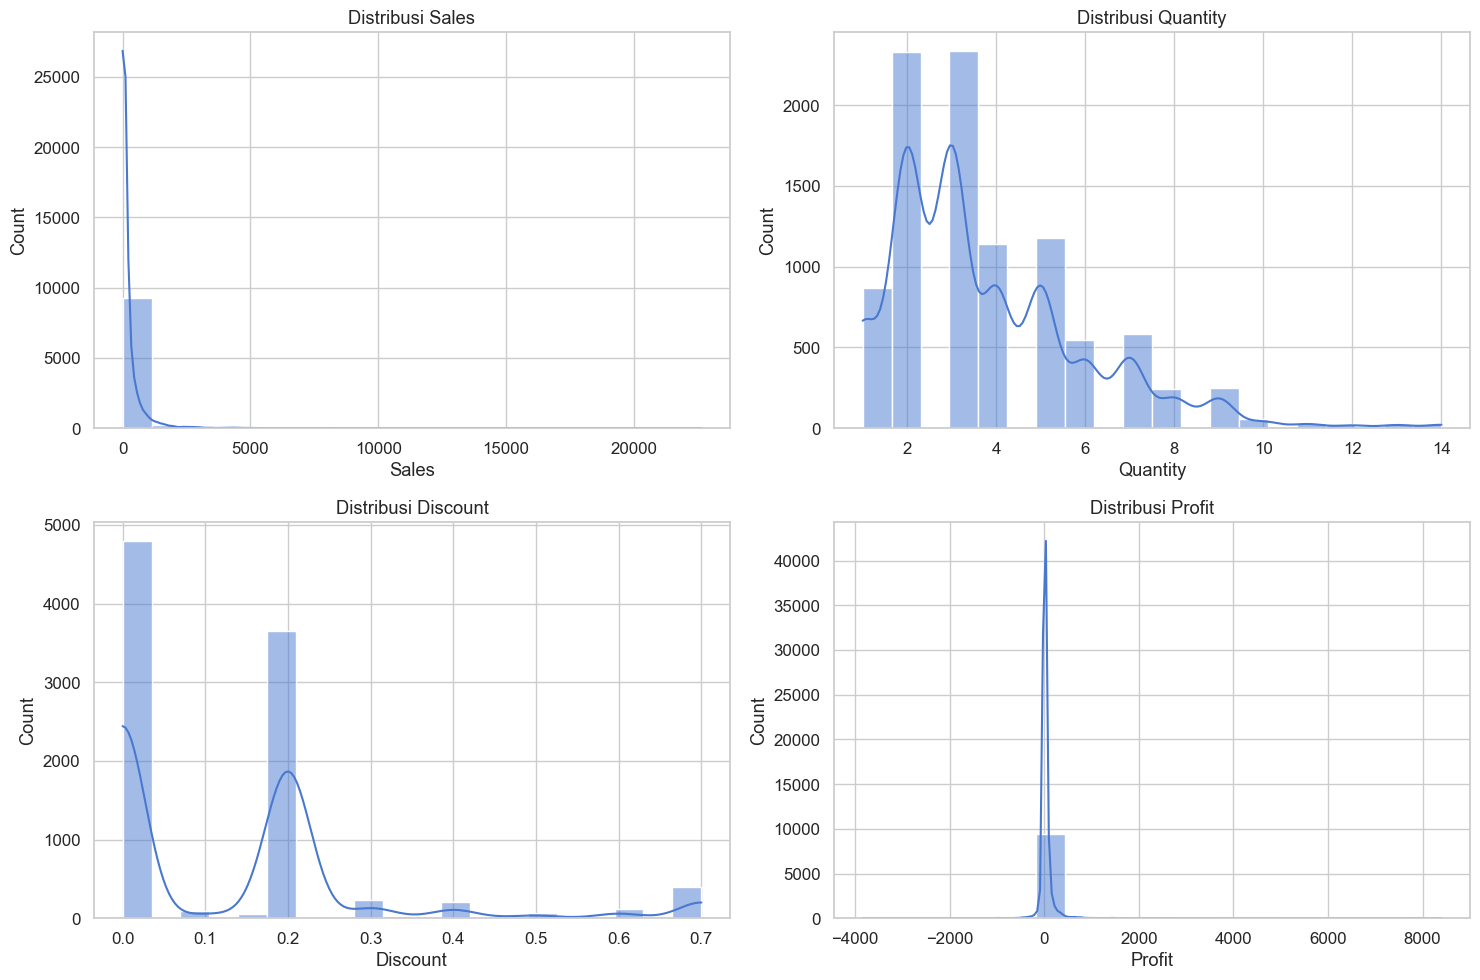

In [152]:
column_saas = ["Sales", "Quantity", "Discount", "Profit"]

plt.figure(figsize=(15,10))
for i, col in enumerate(column_saas, 1):
    plt.subplot(2,2,i)
    sns.histplot(Saas_dataset_clean[col], bins=20, kde=True)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

- **Sales** → Distribusi cenderung right skewed yang dimana banyak transaksi kecil dibandingkan dengan transaksi yang sangat besar, karena bisa kita lihat pada jenis pelanggan (segment) hanya berlangganan Standard Business (SMB), dibandingkan dengan enterprise.

- **Quantity** → Pada persebaran data quantity transaksi terbanyak hanya untuk unit di bawah 4 yang artinya hanya sebagian pelanggan kecil yang membeli dalam jumlah besar

- **Discount** → Pada Grafik discount terdapat persebaran data yang tidak merata, terdapat transaksi tanpa diskon yang mengakibatkan distibusi quantity tidak terlalu banyak 

- **Profit** → Terdapat variasi besar, kemungkinan ada nilai negatif yang dimana beberapa transaksi rugi karena distribusi sales yang kurang menyasar pada pasar enterprise dan quantity yang terlalu sedikit

`Kategori grafik dimana grafik ini berfokus pada perbandingan antara kategori satu dengan kategori lainnya`

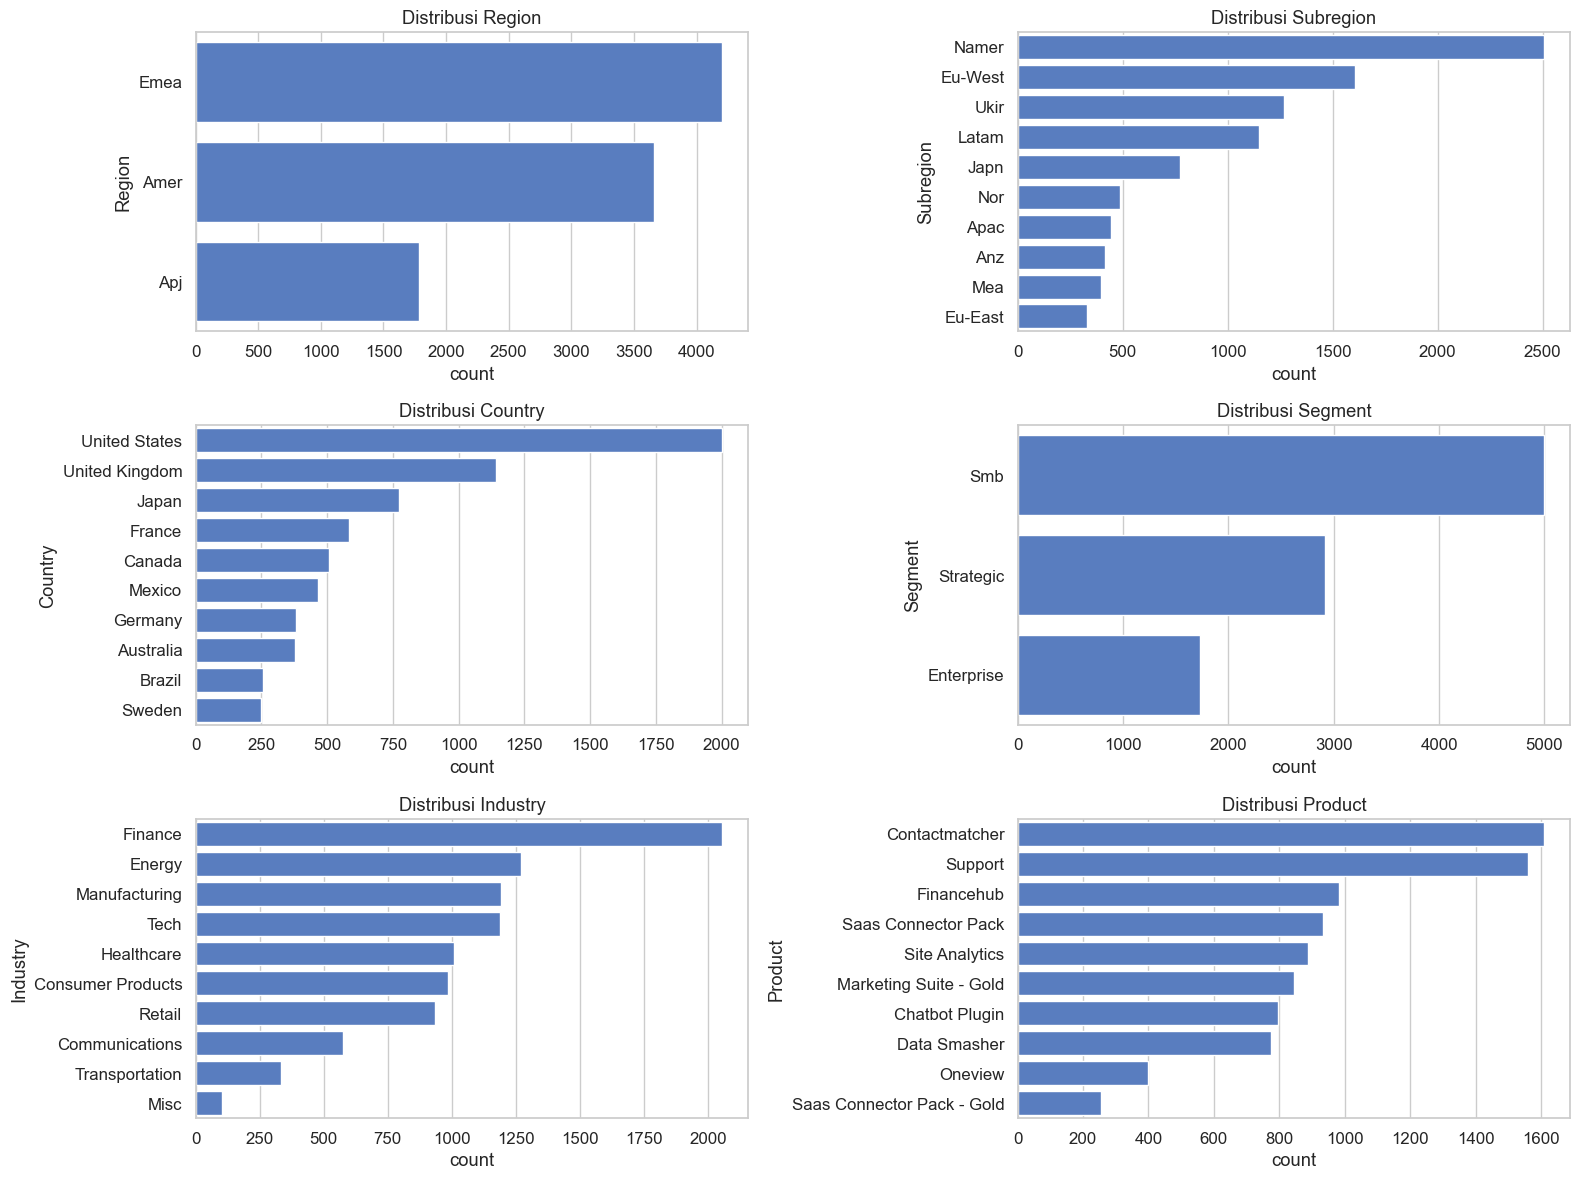

In [153]:
category_column = ["Region", "Subregion", "Country", "Segment", "Industry", "Product", "License"]

plt.figure(figsize=(16,12))
for i, col in enumerate(category_column[:6], 1):
    plt.subplot(3,2,i)
    sns.countplot(y=col, data=Saas_dataset_clean, order=Saas_dataset_clean[col].value_counts().index[:10])
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

- Region → Distribusi pelanggan paling banyak berasal dari EMEA, diikuti oleh AMER, sementara APJ paling sedikit. Ini menunjukkan fokus pasar SaaS masih kuat di EMEA.

- Subregion → Subregion NAMER dan EU-WEST mendominasi transaksi. Beberapa subregion lain seperti LATAM dan JAPN juga signifikan, sementara wilayah seperti EU-EAST relatif kecil kontribusinya.

- Country → United States menjadi negara dengan transaksi terbanyak, diikuti United Kingdom dan Japan. Negara-negara lain (France, Canada, Australia, dll.) menyumbang kontribusi lebih kecil. Hal ini menegaskan dominasi pasar Amerika Utara dan Eropa Barat.

- Segment → Segmen Small Business (SMB) mendominasi jumlah transaksi, jauh lebih besar dibanding Strategic dan Enterprise. Artinya, sebagian besar pelanggan SaaS adalah bisnis kecil-menengah, meski Enterprise tetap penting untuk revenue.

- Industry → Industri Finance menjadi pengguna SaaS terbesar, diikuti oleh Energy dan Tech. Sementara industri Transportation dan Miscellaneous memiliki kontribusi paling kecil. Ini menunjukkan fokus utama produk SaaS ada di sektor keuangan dan teknologi.

- Product → Produk ContactMatcher dan Support adalah yang paling populer di kalangan pelanggan. Produk lain seperti FinanceHub, SaaS Connector Pack, dan Site Analytics juga cukup signifikan, sedangkan produk seperti SaaS Connector Pack – Gold atau OneView jarang digunakan.

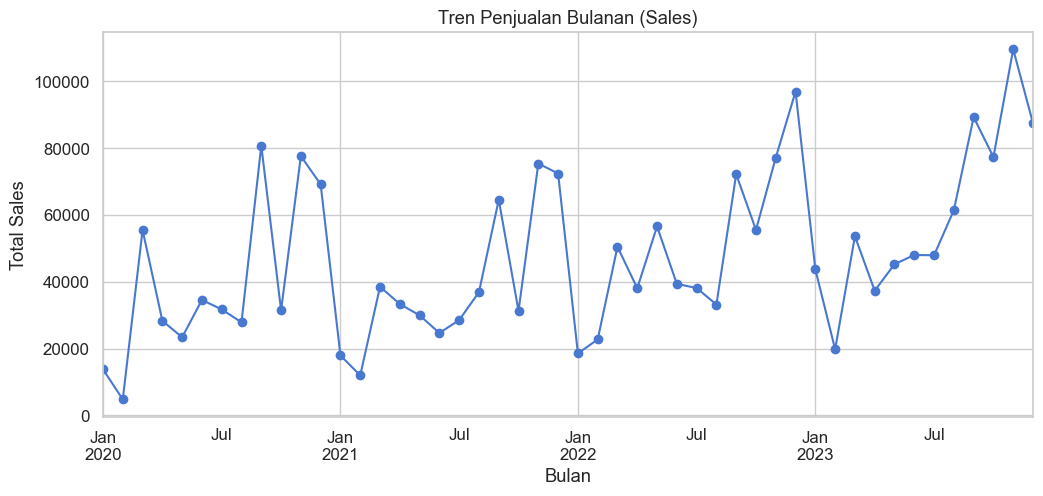

In [197]:
# Konversi Order Date
Saas_dataset_clean["Order Date"] = pd.to_datetime(Saas_dataset_clean["Order Date"], errors="coerce")

# Jumlah order per bulan
monthly_sales = Saas_dataset_clean.groupby(Saas_dataset_clean["Order Date"].dt.to_period("M"))["Sales"].sum()

monthly_sales.plot(kind="line", figsize=(12,5), marker="o")
plt.title("Tren Penjualan Bulanan (Sales)")
plt.xlabel("Bulan")
plt.ylabel("Total Sales")
plt.show()


**Summary tren penjualan**

Data tren penjualan bulanan menunjukan fluktuasi yang cukup tajam. pada awal tahun selalu terjadi penurunan grafik penjualan yang signifikan lalu kembali naik secara siginifikan juga pada pertengahan hingga akhir tahun kemungkinan disebabkan seasonal pada beberapa negara dan juga memiliki kecenderungan naik dari tahun ke tahun walaupun untuk tingkat fluktuatif yang tinggi. Pada awal 2020, penjualan masih relatif rendah, namun mulai 2021 hingga 2022 terjadi peningkatan stabil dengan beberapa lonjakan tinggi. Memasuki 2023, tren semakin menguat dengan capaian puncak di atas 100.000, menandakan adanya pertumbuhan bisnis yang konsisten dan potensi pasar yang semakin besar bagi perusahaan SaaS ini.

### 2.1.7 Summary Data Understanding

Hasil eksplorasi awal menunjukkan bahwa distribusi penjualan cenderung right skewed, di mana banyak transaksi bernilai kecil dibandingkan dengan transaksi besar pada revenue. Profit/Keuntungan yang bervariasi dengan indikasi beberapa transaksi merugi akibat revenue yang bernilai kecil dan penjualan yang tidak signifikan. Mayoritas pelanggan membeli dalam jumlah unit kecil (1–3), terutama berasal dari segmen Small Business, sementara segmen Enterprise meskipun lebih sedikit justru menyumbang revenue lebih tinggi. Secara geografis, transaksi didominasi oleh region EMEA, dengan potensi pertumbuhan di region lain yang masih rendah kontribusinya. Industri seperti Finance, Retail, dan Technology menjadi pengguna utama SaaS, dengan lisensi Basic/Pro paling banyak dipakai tetapi lisensi Enterprise menyumbang porsi revenue terbesar. Analisis tren waktu juga memperlihatkan fluktuasi penjualan bulanan, yang mengindikasikan adanya pola musiman atau faktor eksternal yang memengaruhi performa bisnis.

## 2.2 Data Cleaning

### 2.2.1 Missing Value dan data duplikat

Karena tidak ada missing dan data duplikat value maka selanjutnya kita akan lanjutkan terkait dengan data formatting untuk memberikan konsistensi dan juga membuat tipe data yang bisa di analisis

### 2.2.2 Data Formatting

`1. Standarisasi Teks`

In [211]:
format_cat_column = ['Region', 'Subregion', 'Country', 'Segment', 'Industry', 'Product', 'License']

for col in format_cat_column:
    Saas_dataset_clean[col] = Saas_dataset_clean[col].astype(str).str.strip().str.title()

Memastikan kategori pada data lebih konsisten, mencegah analisis terpecah karena typo/case, agar analisa lebih tepat dan juga tidak terlalu memperhatikan berbagai macam format.

`2. Validasi Numerik`

In [212]:
validation_num_column = ['Sales', 'Profit', 'Discount', 'Quantity']
Saas_dataset_clean[validation_num_column] = Saas_dataset_clean[validation_num_column].apply(pd.to_numeric, errors='coerce')

# Validasi range
print("Nilai negatif pada Quantity:", (Saas_dataset_clean['Quantity'] < 0).sum(), "Dilakukan pengecekan karena quantity tidak boleh negatif")
print("Nilai negatif pada Sales:", (Saas_dataset_clean['Sales'] < 0).sum())
print("Nilai negatif pada Profit:", (Saas_dataset_clean['Profit'] < 0).sum())
print("Nilai Discount di luar range 0-1:", ((Saas_dataset_clean['Discount'] < 0) | (Saas_dataset_clean['Discount'] > 1)).sum())

Nilai negatif pada Quantity: 0 Dilakukan pengecekan karena quantity tidak boleh negatif
Nilai negatif pada Sales: 0
Nilai negatif pada Profit: 1522
Nilai Discount di luar range 0-1: 0


Setelah dilakukan beberapa pengecekan pada data quantity, sales, profit dan juga discount, terdapat data negatif sebanyak 1871 pada data profit.

`3. Mengubah beberapa tipe data pada kolom ID untuk mencegah kesalahan analisa`

In [213]:
# Mengubah tipe data
Saas_dataset_clean['Customer ID'] = Saas_dataset_clean['Customer ID'].astype(str)
Saas_dataset_clean['Order ID'] = Saas_dataset_clean['Order ID'].astype(str)

# Membuang spasi pada tabel
Saas_dataset_clean['Customer ID'] = Saas_dataset_clean['Customer ID'].str.strip()
Saas_dataset_clean['Order ID'] = Saas_dataset_clean['Order ID'].str.strip()


In [214]:
# Melakukan pengecekan ulang setelah tipe data diformat ulang
Saas_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9645 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9645 non-null   int64         
 1   Order ID       9645 non-null   object        
 2   Order Date     9645 non-null   datetime64[ns]
 3   Date Key       9645 non-null   int64         
 4   Contact Name   9645 non-null   object        
 5   Country        9645 non-null   object        
 6   City           9645 non-null   object        
 7   Region         9645 non-null   object        
 8   Subregion      9645 non-null   object        
 9   Customer       9645 non-null   object        
 10  Customer ID    9645 non-null   object        
 11  Industry       9645 non-null   object        
 12  Segment        9645 non-null   object        
 13  Product        9645 non-null   object        
 14  License        9645 non-null   object        
 15  Sales          9645 non-nu

### 2.2.3 Outlier Detection

`Melakukan pengecekan outlier untuk data sales, profit, quantity, dan discount`

In [215]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

for col in ['Sales','Profit','Quantity','Discount']:
    outliers, low, up = detect_outliers_iqr(Saas_dataset_clean, col)
    print(f"{col} → Outliers: {outliers.shape[0]}, Range: {low:.2f} - {up:.2f}")


Sales → Outliers: 1122, Range: -278.30 - 512.54
Profit → Outliers: 1708, Range: -40.60 - 73.99
Quantity → Outliers: 165, Range: -2.50 - 9.50
Discount → Outliers: 507, Range: -0.30 - 0.50


Pengecekan outlier menggabungkan pengecekan yang bernilai positif dan juga negatif yang ekstrim dan sangat besar

`Melakukan visualisasi outlier menggunakan grafik box plot`

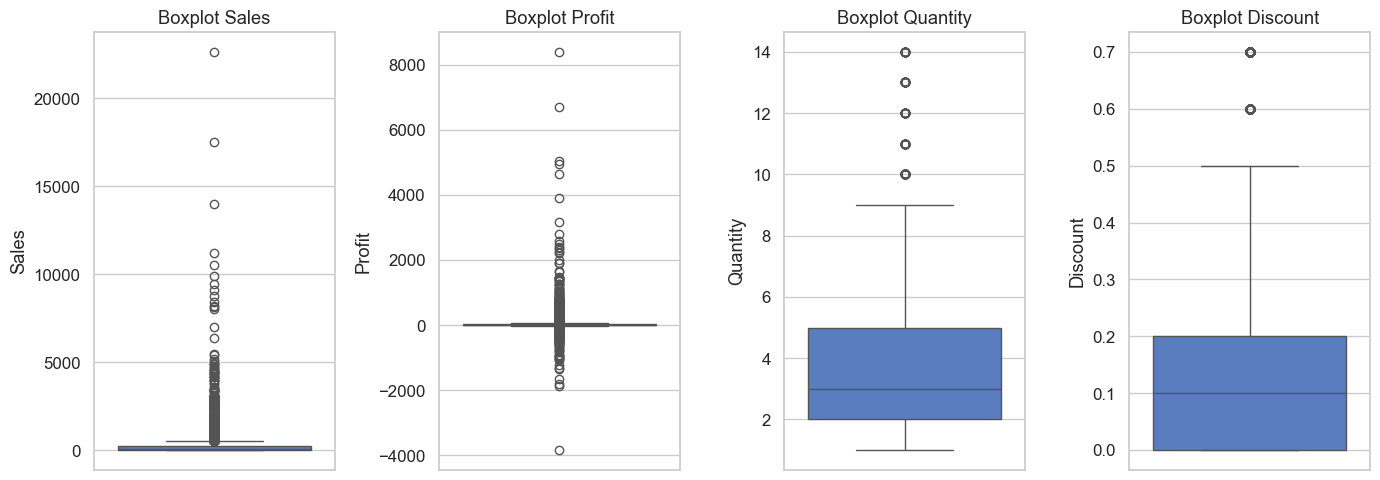

In [216]:
plt.figure(figsize=(14,5))

for i, col in enumerate(['Sales','Profit','Quantity', 'Discount'], 1):
    plt.subplot(1,4,i)
    sns.boxplot(y=Saas_dataset_clean[col])
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()

In [217]:
# Pengecekan distribusi Profit yang bernilai negatif
neg_profit = Saas_dataset_clean[Saas_dataset_clean['Profit'] < 0]
print("Jumlah transaksi dengan Profit negatif:", neg_profit.shape[0])

# Menambahkan flagging untuk menandai mana profit yang valid dan profit yang invalid
def profit_flag(row):
    if row['Profit'] < 0:
        if row['Profit'] < -row['Sales']:
            return "Invalid"
        else:
            return "Valid"
    else:
        return "Positive"

Saas_dataset_clean['Profit_Flag'] = Saas_dataset_clean.apply(profit_flag, axis=1)

# 3. Ringkasan hasil
print(Saas_dataset_clean['Profit_Flag'].value_counts())

# 4. Pisahkan dataset
valid_loss = Saas_dataset_clean[Saas_dataset_clean['Profit_Flag'] == "Valid"]
invalid_loss = Saas_dataset_clean[Saas_dataset_clean['Profit_Flag'] == "Invalid"]

print("Valid Loss (rugi karena strategi):", valid_loss.shape[0])
print("Invalid Loss (kemungkinan error):", invalid_loss.shape[0])


Jumlah transaksi dengan Profit negatif: 1522
Profit_Flag
Positive    8123
Valid       1522
Name: count, dtype: int64
Valid Loss (rugi karena strategi): 1522
Invalid Loss (kemungkinan error): 0


`Setelah dilakukan pengecekan data negatif dan juga pengecekan data profit yang negatif(invalid) selanjutnya melakukan penghapusan beberapa data bernilai < 0 / <= 0`

In [218]:
# Menghapus transaksi dengan Quantity <= 0
Saas_dataset_clean = Saas_dataset_clean[Saas_dataset_clean['Quantity'] > 0]

# Buang transaksi dengan Sales atau Profit negatif (jika terbukti error)
Saas_dataset_clean = Saas_dataset_clean[Saas_dataset_clean['Profit_Flag'] != "Invalid"]


In [219]:
# Pengecekan Quantity <= 0
print("Jumlah Quantity <= 0:", (Saas_dataset_clean['Quantity'] <= 0).sum())

# Pengecekan Sales < 0
print("Jumlah Sales < 0:", (Saas_dataset_clean['Sales'] < 0).sum())

# Pengecekan Profit minus yang valid
print("Jumlah data profit invalid setelah dibersihkan:", (Saas_dataset_clean['Profit_Flag'] == "Invalid").sum())

neg_profit_after = (Saas_dataset_clean['Profit'] < 0).sum()

print("Jumlah transaksi dengan Profit negatif setelah cleaning:", neg_profit_after)
print(Saas_dataset_clean['Profit_Flag'].value_counts())

# Statistik deskriptif setelah cleaning
print("\nStatistik Deskriptif Setelah Cleaning:")
print(Saas_dataset_clean[['Sales','Profit','Quantity','Discount']].describe())

# Cek ukuran data setelah cleaning
print("\nUkuran data setelah cleaning:", Saas_dataset_clean.shape)


Jumlah Quantity <= 0: 0
Jumlah Sales < 0: 0
Jumlah data profit invalid setelah dibersihkan: 0
Jumlah transaksi dengan Profit negatif setelah cleaning: 1522
Profit_Flag
Positive    8123
Valid       1522
Name: count, dtype: int64

Statistik Deskriptif Setelah Cleaning:
              Sales       Profit     Quantity     Discount
count   9645.000000  9645.000000  9645.000000  9645.000000
mean     234.657649    35.331331     3.782893     0.133664
std      630.261769   212.690295     2.224057     0.171776
min        0.852000 -3839.990400     1.000000     0.000000
25%       18.264000     2.370000     2.000000     0.000000
50%       57.408000     9.302400     3.000000     0.100000
75%      215.976000    31.018400     5.000000     0.200000
max    22638.480000  8399.976000    14.000000     0.700000

Ukuran data setelah cleaning: (9645, 21)


**Summary Visualisasi Data**

1. Tren Penjualan Profit vs Non-Profit
- **Mayoritas transaksi menghasilkan profit**; jumlah transaksi profit konsisten jauh lebih tinggi daripada non-profit.
- **Tren meningkat seiring waktu** (2020–2023), terutama transaksi profit yang naik tajam di 2023.
- **Non-profit relatif kecil** tetapi tetap ada, menunjukkan sebagian transaksi menyebabkan kerugian.
- **Implikasi:** strategi penjualan cukup efektif, namun produk/segmen yang sering rugi perlu dipantau.


2. Persebaran Profit berdasarkan Discount (Scatter Plot)
- **Diskon rendah (0–20%) → mayoritas transaksi masih profit.**
- **Diskon tinggi (>30%) → semakin banyak transaksi rugi (profit < 0).**
- Hubungan negatif antara **discount** dan **profit**: semakin tinggi diskon, semakin tinggi risiko kerugian.
- **Implikasi:** perusahaan perlu membatasi diskon besar agar margin tidak tergerus.


3. Boxplot Sales
- Distribusi sangat **skewed ke kanan**; mayoritas transaksi bernilai kecil.
- Ada beberapa outlier dengan sales >20.000 yang mendominasi revenue.
- **Implikasi:** revenue perusahaan sangat bergantung pada sedikit transaksi besar.


4. Boxplot Profit
- Median profit mendekati **0**, menunjukkan sebagian besar transaksi untung tipis.
- Terdapat banyak outlier positif (>8000) **dan negatif (-4000)**.
- **Implikasi:** sebagian transaksi menyebabkan kerugian signifikan, perlu evaluasi produk/strategi.


5. Boxplot Quantity
- Mayoritas pembelian hanya **2–3 item per transaksi**.
- Ada beberapa outlier hingga 14 item, tapi jarang terjadi.
- **Implikasi:** pola konsumsi pelanggan lebih ke arah transaksi kecil/berulang (subscription style).


6. Boxplot Discount
- Median diskon sekitar **10%**, sebagian besar transaksi ada di level rendah.
- Ada outlier diskon tinggi (hingga 70%).
- **Implikasi:** diskon besar sangat jarang, tetapi ketika terjadi berpotensi besar menyebabkan kerugian.


In [208]:
# Cek ulang tipe data setelah data cleaning
Saas_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9645 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9645 non-null   int64         
 1   Order ID       9645 non-null   object        
 2   Order Date     9645 non-null   datetime64[ns]
 3   Date Key       9645 non-null   int64         
 4   Contact Name   9645 non-null   object        
 5   Country        9645 non-null   object        
 6   City           9645 non-null   object        
 7   Region         9645 non-null   object        
 8   Subregion      9645 non-null   object        
 9   Customer       9645 non-null   object        
 10  Customer ID    9645 non-null   object        
 11  Industry       9645 non-null   object        
 12  Segment        9645 non-null   object        
 13  Product        9645 non-null   object        
 14  License        9645 non-null   object        
 15  Sales          9645 non-nu

### 2.2.4 Export to CSV sebagai data baru

In [209]:
Saas_dataset_clean.to_csv("Saas_Sales_Cleaned.csv", index=False)

# 3. Data Visualization and Analisis

Penambahan beberapa visualisasi pada jupyter notebook dikarenakan kekurangan fitur yang ada pada tableau

## 3.1 Tren Jumlah pelanggan Aktif dan Revenue dari waktu ke waktu

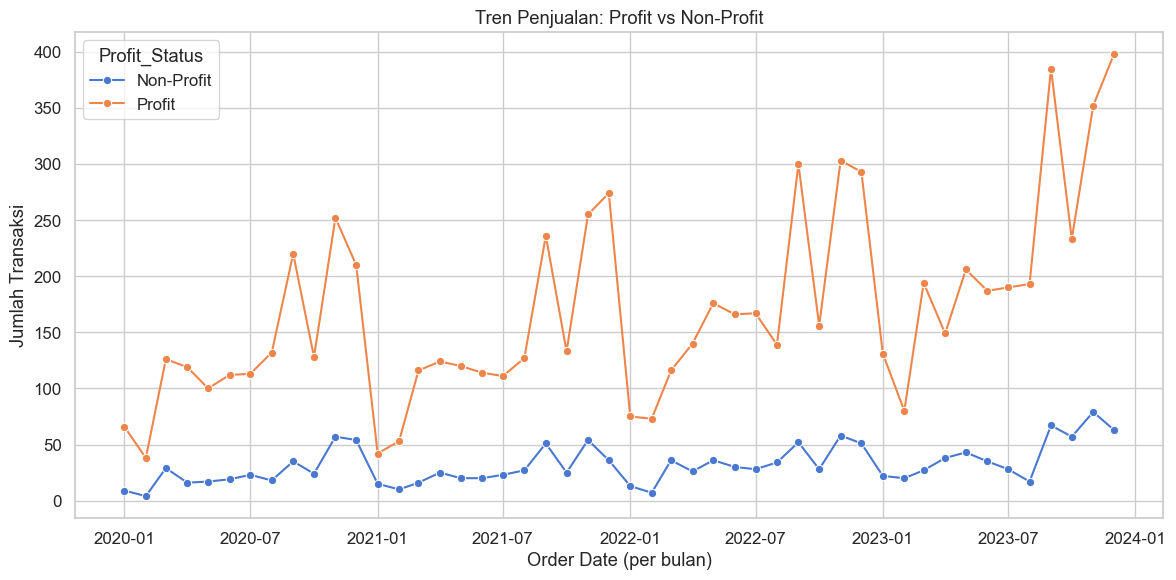

In [298]:
date_col = 'Order Date' if 'Order Date' in Saas_dataset_clean.columns else 'Order_Date'


Saas_dataset_clean[date_col] = pd.to_datetime(Saas_dataset_clean[date_col])
Saas_dataset_clean['Month'] = Saas_dataset_clean[date_col].dt.to_period('M').dt.to_timestamp()

# Mengkategorikan Profit dan non Profit
Saas_dataset_clean['Profit_Status'] = Saas_dataset_clean['Profit'].apply(
    lambda x: 'Profit' if x >= 0 else 'Non-Profit'
)

trend_profit = (
    Saas_dataset_clean.groupby(['Month','Profit_Status'])
      .size()
      .reset_index(name='Count_Sales')
)

plt.figure(figsize=(12,6))
sns.lineplot(data=trend_profit, x='Month', y='Count_Sales',
             hue='Profit_Status', marker='o')
plt.title('Tren Penjualan: Profit vs Non-Profit')
plt.xlabel('Order Date (per bulan)')
plt.ylabel('Jumlah Transaksi')
plt.tight_layout()
plt.show()

**Insight: Perbandingan Tren Penjualan Profit vs Non-Profit**

Dari grafik tren penjualan berdasarkan status profit, terdapat beberapa temuan penting:

1. **Mayoritas transaksi menghasilkan profit**  
   - Jumlah transaksi dengan profit (oranye) konsisten jauh lebih tinggi dibandingkan non-profit (biru).  
   - Hal ini menunjukkan sebagian besar penjualan SaaS bersifat menguntungkan.

2. **Tren meningkat seiring waktu**  
   - Baik transaksi profit maupun non-profit sama-sama menunjukkan tren peningkatan dari tahun 2020 hingga akhir 2023.  
   - Kenaikan paling signifikan terlihat pada transaksi profit di tahun 2023, menandakan pertumbuhan pelanggan atau peningkatan volume penjualan.

3. **Non-Profit relatif kecil tetapi stabil**  
   - Walaupun jumlah transaksi non-profit mengalami kenaikan, angkanya tetap jauh lebih rendah dibandingkan profit.  
   - Ini berarti kerugian masih ada, tetapi dalam porsi yang terkendali.

4. **Pola fluktuasi musiman**  
   - Tren transaksi profit memperlihatkan pola naik-turun di periode tertentu, kemungkinan dipengaruhi oleh promo musiman, campaign marketing, atau siklus pembelian tahunan pelanggan.

5. **Kesenjangan semakin melebar**  
   - Perbedaan antara transaksi profit dan non-profit semakin besar dari tahun ke tahun.  
   - Hal ini menunjukkan efektivitas strategi perusahaan dalam mendorong penjualan yang lebih menguntungkan.

Setelah mengetahui Profit dan non profit dari transaksi per bulan selanjutnya kita akan menghitung trend pelanggan aktif dan revenue perbulan

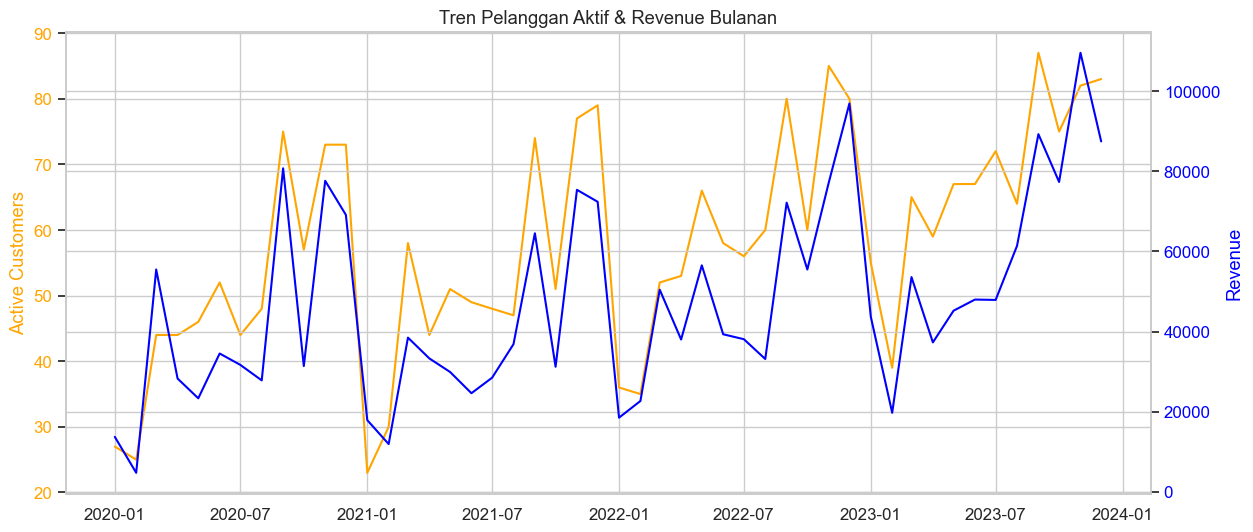

In [318]:
# 1. Hitung jumlah pelanggan unik per bulan
monthly_customers = Saas_dataset_clean.groupby(Saas_dataset_clean['Order Date'].dt.to_period('M'))['Customer ID'].nunique()

# 2. Hitung total revenue per bulan
monthly_revenue = Saas_dataset_clean.groupby(Saas_dataset_clean['Order Date'].dt.to_period('M'))['Sales'].sum()

# Gabungkan ke dataframe
trend_revenue = pd.DataFrame({
    "Customers": monthly_customers,
    "Revenue": monthly_revenue
})
trend_revenue.index = trend_revenue.index.to_timestamp()

# Visualisasi
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(trend_revenue.index, trend_revenue["Customers"], label="Active Customers", color="orange")
ax1.set_ylabel("Active Customers", color="orange")
ax1.tick_params(axis="y", labelcolor="orange")

ax2 = ax1.twinx()
ax2.plot(trend_revenue.index, trend_revenue["Revenue"], label="Revenue", color="blue")
ax2.set_ylabel("Revenue", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("Tren Pelanggan Aktif & Revenue Bulanan")
plt.show()

Berdasarkan order dari tahun ke tahun secara umum revenue mengalami peningkatan dari 2020 hingga 2023 walaupun tidak terlalu signifikan. Di tahun 2020, revenue bulanan rata-rata di bawah **40.000**, sedangkan akhir 2023 sudah mencapai lebih dari **100.000** Menunjukkan **adanya growth bisnis SaaS yang kuat**. Grafik menunjukkan lonjakan tajam di akhir tahun (sekitar Q4, Oktober–Desember), Ada indikasi pola musiman, misalnya **promosi besar/peningkatan permintaan di akhir tahun**. Peningkatan revenue lebih tajam mulai tahun 2022 mungkin karena ekspansi market atau peningkatan akuisisi pelanggan baru.

In [320]:
import statsmodels.api as sm

trend_revenue['Month_Num'] = range(len(trend_revenue))

X = sm.add_constant(trend_revenue['Month_Num'])
y = trend_revenue['Revenue']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     15.48
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           0.000280
Time:                        14:45:53   Log-Likelihood:                -545.91
No. Observations:                  48   AIC:                             1096.
Df Residuals:                      46   BIC:                             1100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.645e+04   6108.676      4.330      0.0

Analisis tren menunjukkan bahwa jumlah pelanggan aktif maupun revenue mengalami peningkatan konsisten dari tahun ke tahun. Hasil uji regresi linear memperlihatkan variabel **Coef/Coefisient** berpengaruh positif signifikan terhadap revenue (p < 0.05), yang berarti kenaikan revenue merupakan tren pertumbuhan yang baik. Dengan kata lain, perusahaan berada dalam fase growth dan bisa berfokus dalam pegembangan ekspansi pasar atau maintenance 

In [321]:
from scipy.stats import normaltest

# Uji normalitas untuk Revenue bulanan
stat_rev, p_rev = normaltest(trend_revenue['Revenue'])
print("Normaltest Revenue: stat=%.3f, p=%.3f" % (stat_rev, p_rev))

# Uji normalitas untuk Customers bulanan
stat_cust, p_cust = normaltest(trend_revenue['Customers'])
print("Normaltest Customers: stat=%.3f, p=%.3f" % (stat_cust, p_cust))

# Interpretasi otomatis
if p_rev > 0.05:
    print("Revenue: Data berdistribusi normal (gagal tolak H0).")
else:
    print("Revenue: Data tidak berdistribusi normal (tolak H0).")

if p_cust > 0.05:
    print("Customers: Data berdistribusi normal (gagal tolak H0).")
else:
    print("Customers: Data tidak berdistribusi normal (tolak H0).")


Normaltest Revenue: stat=3.141, p=0.208
Normaltest Customers: stat=2.079, p=0.354
Revenue: Data berdistribusi normal (gagal tolak H0).
Customers: Data berdistribusi normal (gagal tolak H0).


Hasil uji normalitas menunjukkan bahwa baik revenue maupun jumlah pelanggan aktif **terdistribusi normal**, sehingga tren pertumbuhan yang terlihat menegaskan bahwa bisnis SaaS memang mengalami pertumbuhan yang stabil dan signifikan dari tahun ke tahun.

## 3.2 Pelanggan mana yang memberikan kontribusi revenue tertinggi

In [323]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

<Axes: title={'center': 'Distribusi Segment'}, xlabel='Segment'>

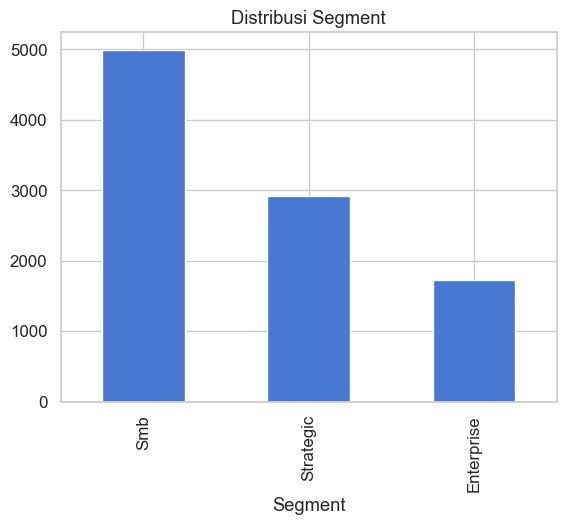

In [332]:
Saas_dataset_clean['Segment'].value_counts().plot(kind='bar', title='Distribusi Segment')


Dari banyaknya pelanggan yang membeli, Pelanggan terbanyak berasal dari segmentasi Small Business(SMB) dengan jumlah hampir **5.000 lebih pelanggan**, yang dimana berarti Saas diminati kalangan bisnis kecil-menengah. Untuk segmentasi strategic mewakili klien besar atua penting secara strategis walau lebih sedikit dari Small Business(SMB) kemungkinan kontribusi revenue/profit mereka lebih tinggi per pelanggan. Untuk segmentasi Enterprise **Hanya sekitar 1.700 pelanggan** dari segmentasi Enterprise.

In [338]:
# Rata-rata dan total revenue per Plan
print("Revenue per Plan:\n", Saas_dataset_clean.groupby('Segment')['Sales'].agg(['mean','sum']))

# Rata-rata dan total revenue per Region
print("\nRevenue per Region:\n", Saas_dataset_clean.groupby('Region')['Sales'].agg(['mean','sum']))

# Rata-rata dan total revenue per Industry (Top 10)
print("\nRevenue per Industry (Top 10):\n", Saas_dataset_clean.groupby('Industry')['Sales'].agg(['mean','sum']).sort_values(by='sum', ascending=False).head(10))


Revenue per Plan:
                   mean           sum
Segment                             
Enterprise  245.252058  4.237956e+05
Smb         228.466285  1.141418e+06
Strategic   238.979771  6.980599e+05

Revenue per Region:
               mean           sum
Region                          
Amer    226.929319  8.301074e+05
Apj     221.452209  3.955136e+05
Emea    247.001175  1.037652e+06

Revenue per Industry (Top 10):
                          mean          sum
Industry                                  
Finance            226.154244  464520.8174
Energy             238.518262  302441.1559
Manufacturing      243.697677  290731.3292
Healthcare         268.228582  270910.8682
Tech               216.647964  257594.4287
Consumer Products  225.823242  222435.8932
Retail             235.080635  219800.3940
Communications     209.200980  120081.3625
Transportation     259.266984   86595.1726
Misc               273.413647   28161.6056


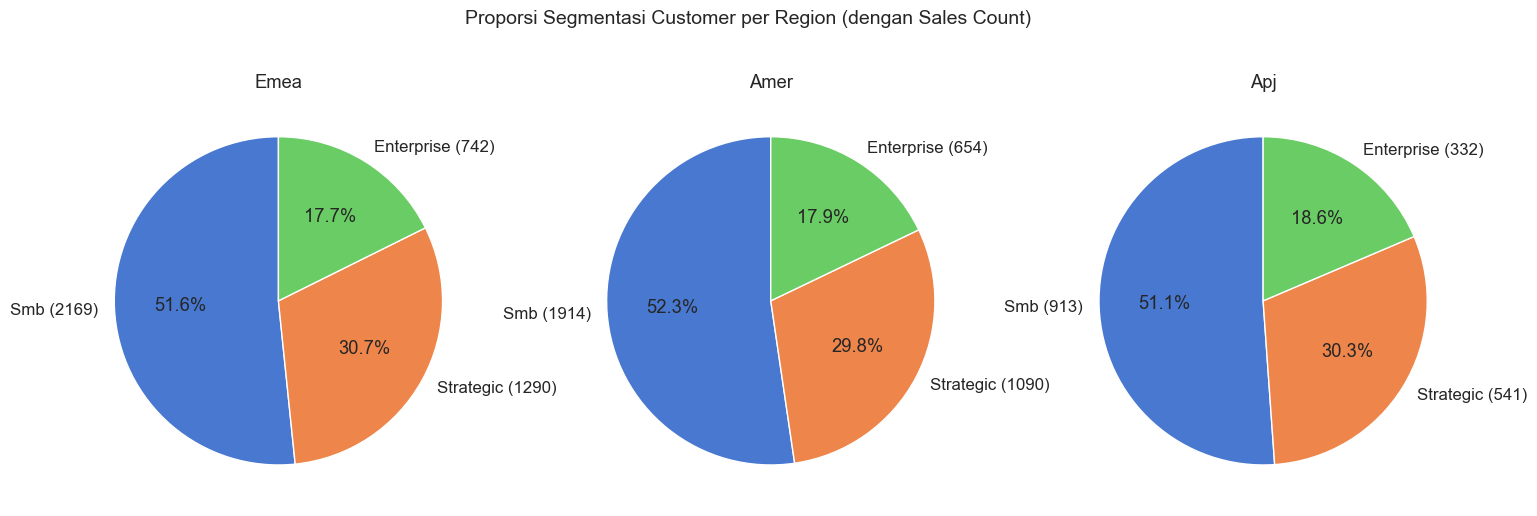

In [ ]:
regions = Saas_dataset_clean['Region'].unique()

fig, axes = plt.subplots(1, len(regions), figsize=(18,6))

for i, region in enumerate(regions):
    seg_counts = Saas_dataset_clean[Saas_dataset_clean['Region'] == region]['Segment'].value_counts()
    
    # Buat label berisi nama segmen + count
    labels = [f"{plan} ({count})" for plan, count in zip(seg_counts.index, seg_counts.values)]
    
    axes[i].pie(seg_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"{region}")

plt.suptitle("Proporsi Segmentasi Customer per Region (dengan Sales Count)", fontsize=14)
plt.show()

In [345]:
# Buat tabel kontingensi
contingency = pd.crosstab(Saas_dataset_clean['Region'], Saas_dataset_clean['Segment'])
print("Tabel Kontingensi:\n", contingency)

# Uji Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency)

print("\nChi-Square Test Plan vs Region")
print("Chi2:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Menolak H0: Distribusi segmen pelanggan berbeda signifikan antar region.")
else:
    print("Gagal Menolak H0: Distribusi segmen pelanggan sama antar region.")

Tabel Kontingensi:
 Segment  Enterprise   Smb  Strategic
Region                              
Amer            654  1914       1090
Apj             332   913        541
Emea            742  2169       1290

Chi-Square Test Plan vs Region
Chi2: 1.51542647535895
p-value: 0.8239053928058642
Gagal Menolak H0: Distribusi segmen pelanggan sama antar region.


In [351]:
from scipy.stats import f_oneway

# Untuk region Amer
amer_data = Saas_dataset_clean[Saas_dataset_clean['Region']=="Amer"]
anova_amer = f_oneway(
    amer_data[amer_data['Segment']=="Smb"]['Sales'],
    amer_data[amer_data['Segment']=="Enterprise"]['Sales'],
    amer_data[amer_data['Segment']=="Strategic"]['Sales']
)
print("ANOVA Revenue antar Plan di Region Amer:", anova_amer)

# Contoh untuk region Emea
emea_data = Saas_dataset_clean[Saas_dataset_clean['Region']=="Emea"]
anova_emea = f_oneway(
    emea_data[emea_data['Segment']=="Smb"]['Sales'],
    emea_data[emea_data['Segment']=="Enterprise"]['Sales'],
    emea_data[emea_data['Segment']=="Strategic"]['Sales']
)
print("ANOVA Revenue antar Plan di Region Emea:", anova_emea)

# Contoh untuk region Apj
apj_data = Saas_dataset_clean[Saas_dataset_clean['Region']=="Apj"]
anova_apj = f_oneway(
    apj_data[apj_data['Segment']=="Smb"]['Sales'],
    apj_data[apj_data['Segment']=="Enterprise"]['Sales'],
    apj_data[apj_data['Segment']=="Strategic"]['Sales']
)
print("ANOVA Revenue antar Plan di Region Apj:", anova_apj)

ANOVA Revenue antar Plan di Region Amer: F_onewayResult(statistic=np.float64(0.8741115648280277), pvalue=np.float64(0.41731974212850986))
ANOVA Revenue antar Plan di Region Emea: F_onewayResult(statistic=np.float64(1.772312213407412), pvalue=np.float64(0.17006672833768208))
ANOVA Revenue antar Plan di Region Apj: F_onewayResult(statistic=np.float64(0.7362083321819585), pvalue=np.float64(0.47907193477573795))


1. **Amer**
- P-value = 0.417 (> 0.05) → gagal menolak H0.
- Artinya, tidak ada perbedaan signifikan revenue rata-rata antar segmen (SMB, Enterprise, Strategic) di region Amer.

2. **Emea**
- P-value = 0.170 (> 0.05) → gagal menolak H0.
- Sama halnya, tidak ada perbedaan signifikan revenue rata-rata antar segmen di region Emea.

3. **Apj** (Asia Pasifik)
- P-value = 0.479 (> 0.05) → gagal menolak H0.
- Tidak ada perbedaan signifikan revenue rata-rata antar segmen di region Apj.

Secara statistik, perbedaan revenue antar plan (SMB, Enterprise, Strategic) di masing-masing region tidak signifikan (p > 0.05 di semua region). Dengan kata lain, meskipun secara jumlah pelanggan SMB mendominasi, average revenue per segmen tidak berbeda jauh dalam tiap region.

## 3.3 Persebaran Profit Berdasarkan Discount

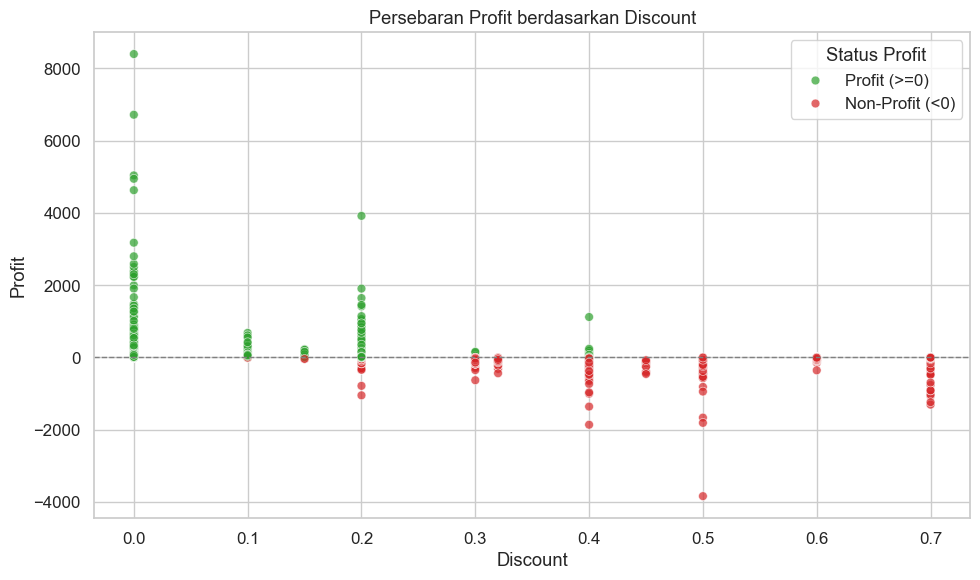

In [225]:
Saas_dataset_clean['Profit_Status'] = np.where(Saas_dataset_clean['Profit'] >= 0, 'Profit (>=0)', 'Non-Profit (<0)')

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=Saas_dataset_clean,
    x='Discount', y='Profit',
    hue='Profit_Status',
    palette={'Profit (>=0)':'tab:green','Non-Profit (<0)':'tab:red'},
    alpha=0.7, s=40
)

plt.axhline(0, color='grey', linewidth=1, linestyle='--')

plt.title('Persebaran Profit berdasarkan Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend(title='Status Profit')
plt.tight_layout()
plt.show()

1. **Diskon rendah (0–0.2)** → mayoritas transaksi masih profit.
Banyak titik hijau dengan nilai profit tinggi (hingga >8000).

2. **Diskon tinggi (>0.2)** → semakin banyak transaksi yang rugi.
Hampir semua titik berubah jadi merah, terutama ketika diskon mendekati 0.5–0.7.

3. **Hubungan negatif antara discount dan profit**.
Semakin besar diskon, semakin besar kemungkinan profit menjadi negatif.

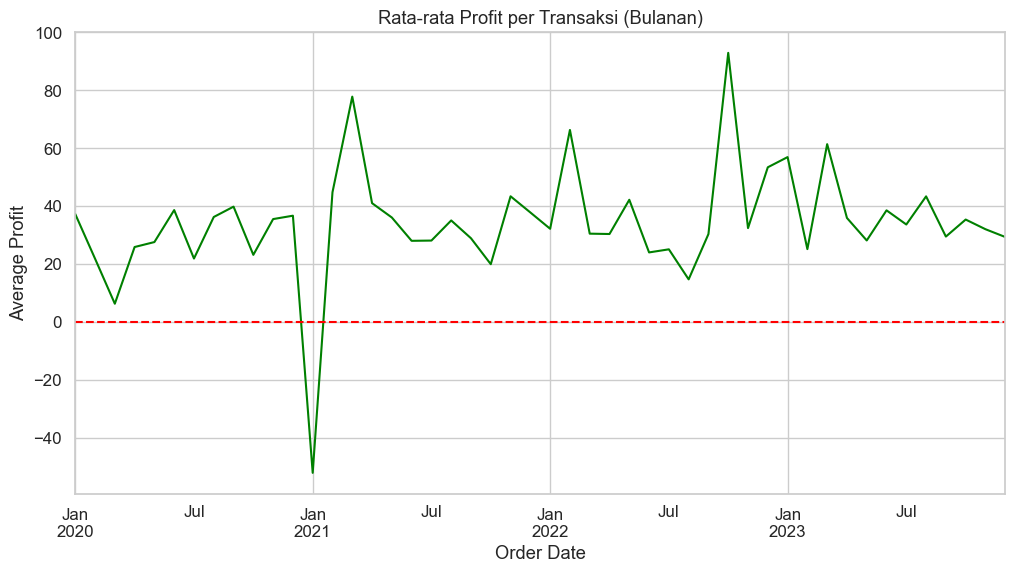

In [ ]:
monthly_avg_profit = Saas_dataset_clean.groupby(
    Saas_dataset_clean['Order Date'].dt.to_period('M')
)['Profit'].mean()

plt.figure(figsize=(12,6))
monthly_avg_profit.plot(color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title("Rata-rata Profit per Transaksi (Bulanan)")
plt.xlabel("Order Date")
plt.ylabel("Average Profit")
plt.show()


Sebagian besar transaksi menghasilkan profit positif, namun terdapat persentase signifikan transaksi yang rugi (profit negatif). Hal ini menunjukkan bahwa meskipun bisnis SaaS secara umum menguntungkan, ada bagian dari strategi harga atau diskon yang membuat sejumlah transaksi tidak profitabel. Oleh karena itu, perusahaan perlu meninjau kembali produk atau segmen pelanggan yang sering menyebabkan rugi untuk memastikan pertumbuhan profit lebih stabil.

Setelah tau persebaran profitnya selanjutnya mencari tau apa saja yang mempengaruhi profitnya < 0.

In [352]:
# Tambah kolom Profit_Status
Saas_dataset_clean['Profit_Status'] = Saas_dataset_clean['Profit'].apply(lambda x: "Non-Profit" if x < 0 else "Profit")

# Cek distribusi
print(Saas_dataset_clean['Profit_Status'].value_counts(normalize=True)*100)


Profit_Status
Profit        84.219803
Non-Profit    15.780197
Name: proportion, dtype: float64


terdapat 15.7 % profit yang ada pada transaksi data Saas yang telah di cleaning

/var/folders/s7/9mlqf7tx2036s4g_l0274ckc0000gn/T/ipykernel_39777/2129597293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Profit_Status', y='Discount', data=Saas_dataset_clean, palette="Set2")


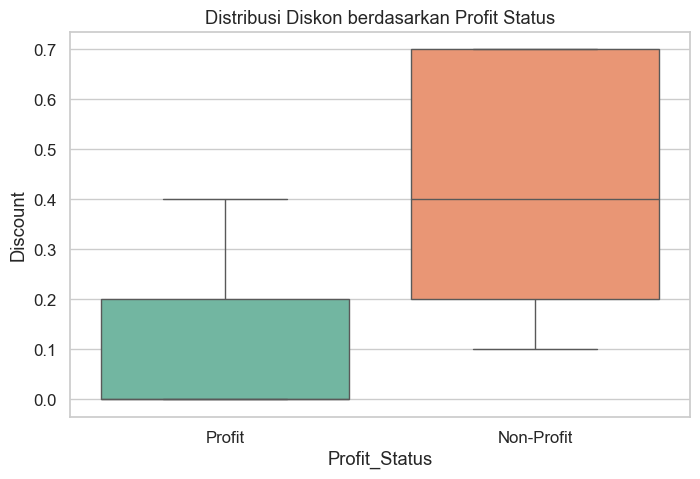

T-test Diskon Profit vs Non-Profit: t=-61.572, p=0.00000


In [372]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Profit_Status', y='Discount', data=Saas_dataset_clean, palette="Set2")
plt.title("Distribusi Diskon berdasarkan Profit Status")
plt.show()

from scipy.stats import ttest_ind

profit_disc = Saas_dataset_clean[Saas_dataset_clean['Profit_Status']=="Profit"]['Discount']
nonprofit_disc = Saas_dataset_clean[Saas_dataset_clean['Profit_Status']=="Non-Profit"]['Discount']

t_stat, p_val = ttest_ind(profit_disc, nonprofit_disc, equal_var=False)
print("T-test Diskon Profit vs Non-Profit: t=%.3f, p=%.5f" % (t_stat, p_val))


p < 0.05, berarti diskon berbeda signifikan antara transaksi profit dan non-profit (biasanya non-profit punya diskon lebih tinggi).

/var/folders/s7/9mlqf7tx2036s4g_l0274ckc0000gn/T/ipykernel_39777/2225668691.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='NonProfit%', data=plan_prop, palette="Set2")


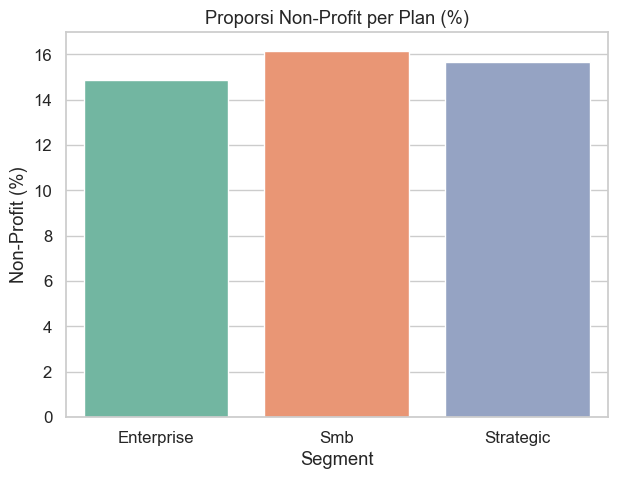

In [369]:
# 1. Proporsi Non-Profit per Plan
plan_prop = (Saas_dataset_clean.groupby('Segment')['Profit_Status']
             .apply(lambda x: (x=="Non-Profit").mean()*100)
             .reset_index(name='NonProfit%'))

plt.figure(figsize=(7,5))
sns.barplot(x='Segment', y='NonProfit%', data=plan_prop, palette="Set2")
plt.title("Proporsi Non-Profit per Plan (%)")
plt.ylabel("Non-Profit (%)")
plt.show()


/var/folders/s7/9mlqf7tx2036s4g_l0274ckc0000gn/T/ipykernel_39777/3161957212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='NonProfit%', data=region_prop, palette="Set3")


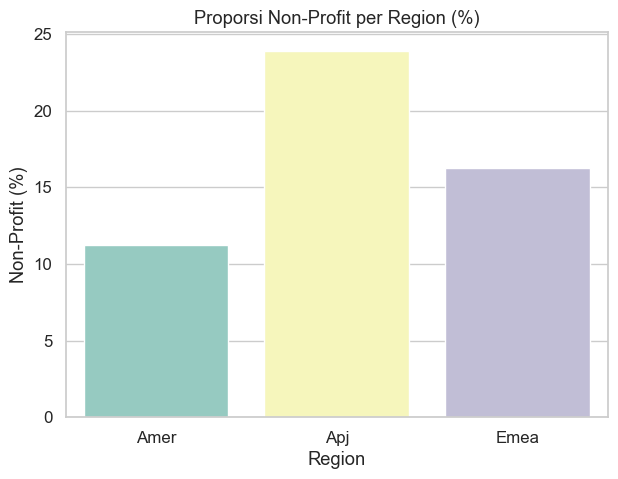

In [371]:
region_prop = (Saas_dataset_clean.groupby('Region')['Profit_Status']
               .apply(lambda x: (x=="Non-Profit").mean()*100)
               .reset_index(name='NonProfit%'))

plt.figure(figsize=(7,5))
sns.barplot(x='Region', y='NonProfit%', data=region_prop, palette="Set3")
plt.title("Proporsi Non-Profit per Region (%)")
plt.ylabel("Non-Profit (%)")
plt.show()

Dari beberapa proporsi non-profit diberdasarkan region, plan dan juga discount, pada kasus non profit yang paling berpengaruh yaitu **discount**. transaksi non-profit rata-rata punya diskon jauh lebih tinggi Sehingga dapat disimpulkan bahwa dengan discount yang tinggi keuntungan untuk penjualan juga makin berkurang.

## 3.4 retensi pelanggan baru dan return

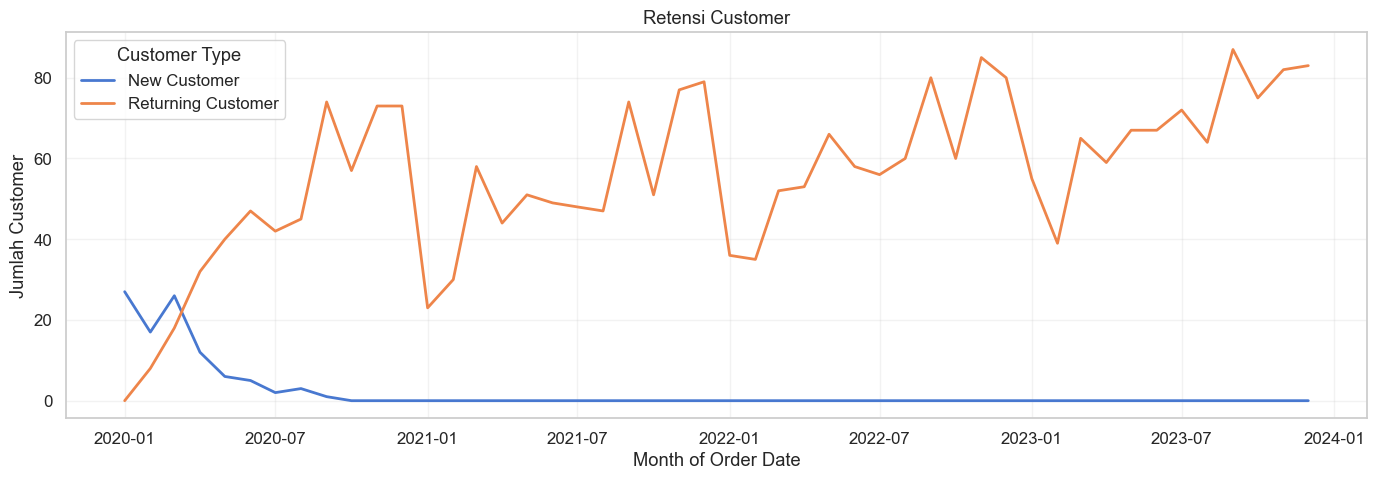

In [407]:
Saas_dataset_clean['Order Date'] = pd.to_datetime(Saas_dataset_clean['Order Date'])
Saas_dataset_clean['Month'] = Saas_dataset_clean['Order Date'].dt.to_period('M').dt.to_timestamp()

# --- new customer per bulan (first order) ---
first_month = (Saas_dataset_clean
               .groupby('Customer ID')['Month'].min())            # bulan pertama tiap customer
months = pd.date_range(Saas_dataset_clean['Month'].min(),
                       Saas_dataset_clean['Month'].max(), freq='MS')

new_cnt = (first_month.value_counts().sort_index()
           .reindex(months, fill_value=0).rename('New Customer'))

# --- active customer per bulan (distinct), returning = active - new ---
active_cnt = (Saas_dataset_clean.groupby('Month')['Customer ID'].nunique()
              .reindex(months, fill_value=0).rename('Active'))

ret_cnt = (active_cnt - new_cnt).clip(lower=0).rename('Returning Customer')

# --- gabung & plot ---
ret_df = pd.concat([new_cnt, ret_cnt], axis=1)

plt.figure(figsize=(14,5))
plt.plot(ret_df.index, ret_df['New Customer'],  label='New Customer',       linewidth=2)
plt.plot(ret_df.index, ret_df['Returning Customer'], label='Returning Customer', linewidth=2)

plt.title('Retensi Customer')
plt.xlabel('Month of Order Date')
plt.ylabel('Jumlah Customer')
plt.legend(title='Customer Type')
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


In [ ]:
# Memastikan kolom order date kedalam bentuk datetime
Saas_dataset_clean['Order Date'] = pd.to_datetime(Saas_dataset_clean['Order Date'])

# Mengurutkan data per Customer
Saas_dataset_clean = Saas_dataset_clean.sort_values(by=['Customer ID','Order Date'])

# Mencari order pertama tiap customer
first_order = Saas_dataset_clean.groupby('Customer ID')['Order Date'].min().reset_index()
first_order.rename(columns={'Order Date':'First_Order_Date'}, inplace=True)

Saas_dataset_clean['Customer Type'] = Saas_dataset_clean.apply(
    lambda x: 'New' if x['Order Date'] == x['First_Order_Date'] else 'Existing', axis=1
)

# Cek hasil distribusi
print(Saas_dataset_clean['Customer Type'].value_counts())


Customer Type
Existing    9451
New          194
Name: count, dtype: int64


/var/folders/s7/9mlqf7tx2036s4g_l0274ckc0000gn/T/ipykernel_39777/4255024096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Type', y='Sales', data=Saas_dataset_clean, palette="Set2")


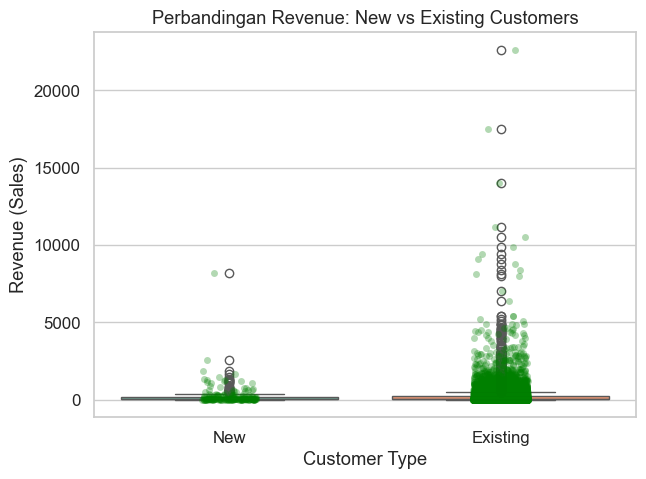

In [387]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Customer Type', y='Sales', data=Saas_dataset_clean, palette="Set2")
sns.stripplot(x='Customer Type', y='Sales', data=Saas_dataset_clean, 
              color='Green', alpha=0.3, jitter=True)

plt.title("Perbandingan Revenue: New vs Existing Customers")
plt.ylabel("Revenue (Sales)")
plt.xlabel("Customer Type")
plt.show()


Grafik retensi menunjukkan bahwa akuisisi pelanggan baru hanya terjadi di awal periode analisis, kemudian menurun drastis hingga hampir nol. Sebaliknya, pelanggan lama yang melakukan pembelian ulang terus meningkat dan mendominasi tren. Hal ini menandakan bahwa keberlanjutan bisnis SaaS ini lebih banyak ditopang oleh retensi pelanggan lama daripada penambahan pelanggan baru.

# Kesimpulan dan Rekomendasi

## Kesimpulan Hasil Analisa

Berdasarkan hasil uji analisa dibeberapa sisi seperti Tren Pelanggan dan hasil revenue hingga retensi pelanggan baru dan lama kita bisa simpulkan bahwa: 

- Pada segment Strategic & Enterprise, Region North America, serta industri Technology adalah penyumbang revenue tertinggi. Segmen Basic Plan dan Non-Profit memiliki kontribusi revenue paling kecil.
- Ditemukan transaksi dengan profit negatif, terutama akibat diskon yang terlalu tinggi, Produk dengan margin tinggi lebih banyak berasal dari plan Premium & Enterprise.
- Jumlah pelanggan baru di bulan-bulan awal, namun setelah pertengahan 2020 jumlah New Customer terus menurun hingga hampir nol.
- Produk tanpa diskon cenderung menghasilkan profit lebih stabil.
- Plan dan Region terbukti signifikan memengaruhi revenue
- Profit tidak merata antar segmen; sebagian besar profit terkonsentrasi pada segment Premium/Enterprise.
- Region lain (misalnya Asia atau EMEA) berkontribusi lebih kecil, sehingga masih ada ruang untuk ekspansi.

## Rekomendasi Untuk Bisnis

1. Fokus Retention & Upselling

- Memprioritaskan pelanggan Strategic & Enterprise melalui program loyalty, customer success, atau fitur eksklusif.
- Melakukan upselling pada pelanggan Basic agar naik ke plan lebih tinggi atau di barengi harga promo atau package agar pengguna lebih tertarik untuk berpindah dari Basic ke Strategic.

2. Evaluasi Pricing & Diskon
- Memberikan batasan pada diskon untuk menghindari profit negatif, Berikan package lain atau tawaran lain selain discount untuk menghindari kerugian atau profit negatif dari dampak discount yang sangat besar.
- Menerapkan A/B testing pada package pricing untuk menentukan harga optimal di tiap region.

3. Perkuat Onboarding Pelanggan Baru
- Menyediakan training, onboarding support, atau free trial untuk mendorong konversi pelanggan baru agar pelanggan dapat lebih mempercayai product dan meningkatkan upselling.

4. Segmen baru pada product non-profit
- Buat Strategi paket khusus dengan fitur terbatas namun harga terjangkau.
- Strategi ini bisa meningkatkan brand image sekaligus penetrasi pasar baru.
- Gunakan Pemisahan dengan menggunakan add-on agar beberapa fitur menjadi eksklusif dan mendapat daya jual yang baru.

5. Strategi Regional & Industri
- Fokus ekspansi di North America & Technology Industry karena profit tinggi.
- Optimalkan budget marketing sesuai kontribusi masing-masing region.
- Ekspansi Bisnis ke market yang lebih luas di arah asia dan sekitarnya dengan membuat campaign untuk small business di wilayah asia.
- Kembangkan metrik Customer Lifetime Value (CLV) agar strategi lebih berorientasi jangka panjang.